<a href="https://colab.research.google.com/github/Lasitha99-star/Academic-Projects/blob/main/Student's%20Drop%20out%20and%20Academic/Copy_of_balanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving academic_cleaned (1).csv to academic_cleaned (1).csv


In [ ]:
import pandas as pd
import io
df=pd.read_csv(io.BytesIO(uploaded['academic_cleaned (1).csv']))
#df=df.drop('cluster',axis=1)
df

In [ ]:
df=df.drop(['x','nationality'],axis=1)
df

,marital_status,course,attendance,prev_qualification,displaced,edu_special_needs,debtor,tuition,gender,scholarship,age,international,UR,IR,GDP,Target
0,Single,Technology and Design,Daytime,Secondary Education,Yes,No,No,Yes,Male,No,20,No,10.8,1.4,1.74,Dropout
1,Single,Business and Management,Daytime,Secondary Education,Yes,No,No,No,Male,No,19,No,13.9,-0.3,0.79,Graduate
2,Single,Technology and Design,Daytime,Secondary Education,Yes,No,No,No,Male,No,19,No,10.8,1.4,1.74,Dropout
3,Single,Communication and Education,Daytime,Secondary Education,Yes,No,No,Yes,Female,No,20,No,9.4,-0.8,-3.12,Graduate
4,Married,Other,Evening,Secondary Education,No,No,No,Yes,Female,No,45,No,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,Single,Communication and Education,Daytime,Secondary Education,No,No,No,Yes,Male,No,19,No,15.5,2.8,-4.06,Graduate
3626,Single,Communication and Education,Daytime,Secondary Education,Yes,No,Yes,No,Female,No,18,Yes,11.1,0.6,2.02,Dropout
3627,Single,Other,Daytime,Secondary Education,Yes,No,No,Yes,Female,Yes,30,No,13.9,-0.3,0.79,Dropout
3628,Single,Business and Management,Daytime,Secondary Education,Yes,No,No,Yes,Female,Yes,20,No,9.4,-0.8,-3.12,Graduate


In [ ]:
#df1=df.drop('Target',axis=1)

In [ ]:
#df1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df['Target'] = LabelEncoder().fit_transform(df['Target'])
df['Target'].value_counts()

1    2209
0    1421
Name: Target, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['marital_status','course','attendance','prev_qualification','displaced','edu_special_needs','debtor','tuition','gender','scholarship','international'])

In [ ]:
df

,age,UR,IR,GDP,Target,marital_status_Complicated,marital_status_Married,marital_status_Single,course_Agriculture and Veterinary,course_Business and Management,...,debtor_No,debtor_Yes,tuition_No,tuition_Yes,gender_Female,gender_Male,scholarship_No,scholarship_Yes,international_No,international_Yes
0,20,10.8,1.4,1.74,0,0,0,1,0,0,...,1,0,0,1,0,1,1,0,1,0
1,19,13.9,-0.3,0.79,1,0,0,1,0,1,...,1,0,1,0,0,1,1,0,1,0
2,19,10.8,1.4,1.74,0,0,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0
3,20,9.4,-0.8,-3.12,1,0,0,1,0,0,...,1,0,0,1,1,0,1,0,1,0
4,45,13.9,-0.3,0.79,1,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,19,15.5,2.8,-4.06,1,0,0,1,0,0,...,1,0,0,1,0,1,1,0,1,0
3626,18,11.1,0.6,2.02,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,0,1
3627,30,13.9,-0.3,0.79,0,0,0,1,0,0,...,1,0,0,1,1,0,0,1,1,0
3628,20,9.4,-0.8,-3.12,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,1,0


In [ ]:
#df_marital_status = pd.get_dummies(df['marital_status'])
#df_new = pd.concat([df, df_marital_status], axis=1)
#df_new

In [ ]:
#df['marital_status'] = LabelEncoder().fit_transform(df['marital_status'])
#df['course'] = LabelEncoder().fit_transform(df['course'])
#df['attendance'] = LabelEncoder().fit_transform(df['attendance'])
#df['prev_qualification'] = LabelEncoder().fit_transform(df['prev_qualification'])
#df['displaced'] = LabelEncoder().fit_transform(df['displaced'])
#df['edu_special_needs'] = LabelEncoder().fit_transform(df['edu_special_needs'])
#df['debtor'] = LabelEncoder().fit_transform(df['debtor'])
#df['tuition'] = LabelEncoder().fit_transform(df['tuition'])
#df['gender'] = LabelEncoder().fit_transform(df['gender'])
#df['scholarship'] = LabelEncoder().fit_transform(df['scholarship'])
#df['international'] = LabelEncoder().fit_transform(df['international'])


In [ ]:
df1=df.drop(['Target'],axis=1)

In [ ]:
df1

In [ ]:
x = df1.iloc[:, :32].values

In [ ]:
x=df1

In [ ]:
x

array([[20. , 10.8,  1.4, ...,  0. ,  1. ,  0. ],
       [19. , 13.9, -0.3, ...,  0. ,  1. ,  0. ],
       [19. , 10.8,  1.4, ...,  0. ,  1. ,  0. ],
       ...,
       [30. , 13.9, -0.3, ...,  1. ,  1. ,  0. ],
       [20. ,  9.4, -0.8, ...,  1. ,  1. ,  0. ],
       [22. , 12.7,  3.7, ...,  0. ,  0. ,  1. ]])

In [ ]:
#x = df.iloc[:, :15].values
#x = StandardScaler().fit_transform(x)
#x

In [ ]:
y = df['Target'].values
y

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
y=df['Target']
y

0       0
1       1
2       0
3       1
4       1
       ..
3625    1
3626    0
3627    0
3628    1
3629    1
Name: Target, Length: 3630, dtype: int64

In [ ]:
#x = pd.DataFrame(x)
#y = pd.Series(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
from google.colab import files
x_train.to_csv('filename.csv')
files.download('filename.csv')

In [ ]:
train = pd.concat([x_train, y_train], axis=1)
train

In [ ]:
train['Target'].value_counts()

1    1761
0    1143
Name: Target, dtype: int64

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = train[(train['Target']==1)]
df_minority = train[(train['Target']==0)]
# upsample minority class
df_majority_downsampled = resample(df_majority,
                                 replace=True,    # sample with replacement
                                 n_samples= 1143, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [ ]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(x_train, y_train)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [ ]:
df_downsampled['Target'].value_counts()

1    1143
0    1143
Name: Target, dtype: int64

In [ ]:
x_train=df_downsampled.drop(['Target'],axis=1)
x_train

In [ ]:
y_train=df_downsampled.Target
y_train

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
#from sklearn.model_selection import train_test_split, KFold

#kf = KFold(n_splits = 10, shuffle = True, random_state = 2304)
#for tr_idx, te_idx in kf.split(x):
   # x_train, x_test = x.iloc[tr_idx], x.iloc[te_idx]
    #y_train, y_test = y.iloc[tr_idx], y.iloc[te_idx]

#x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3977, 15), (441, 15), (3977,), (441,))

In [ ]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()

In [ ]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = model_nb.predict(x_test)

In [ ]:
perform(y_pred_nb)

In [ ]:
y_pred_nbtr = model_nb.predict(x_train)

In [ ]:
perform(y_pred_nbtr)

In [ ]:
def perform(y_pred):
    print("Precision : ", precision_score(y_train, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_train, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_train, y_pred))
    print("F1 Score : ", f1_score(y_train, y_pred, average = 'micro'))
    cm = confusion_matrix(y_train, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_train, y_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = model_lr.predict(x_test)

In [ ]:
perform(y_pred_lr)

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

In [ ]:
y_pred_rf = model_rf.predict(x_test)

In [ ]:
perform(y_pred_rf)

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features='age'
PartialDependenceDisplay.from_estimator(model_rf, x_train, [features])

In [ ]:
n_cols = 2
n_rows = int(len(x_train.columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 50))
PartialDependenceDisplay.from_estimator(model_rf, x_train, x_train.columns, ax=ax, n_cols=n_cols)
fig.suptitle('Partial Dependence Plots')
fig.tight_layout();

In [ ]:
feature_names = list(df1.columns)

In [ ]:
feature_names

['age',
 'UR',
 'IR',
 'GDP',
 'marital_status_Complicated',
 'marital_status_Married',
 'marital_status_Single',
 'course_Agriculture and Veterinary',
 'course_Business and Management',
 'course_Communication and Education',
 'course_Other',
 'course_Technology and Design',
 'attendance_Daytime',
 'attendance_Evening',
 'prev_qualification_High School',
 'prev_qualification_Higher Education',
 'prev_qualification_Other',
 'prev_qualification_Secondary Education',
 'displaced_No',
 'displaced_Yes',
 'edu_special_needs_No',
 'edu_special_needs_Yes',
 'debtor_No',
 'debtor_Yes',
 'tuition_No',
 'tuition_Yes',
 'gender_Female',
 'gender_Male',
 'scholarship_No',
 'scholarship_Yes',
 'international_No',
 'international_Yes']

In [ ]:
import seaborn as sns

RFClassifier_importances_values = model_rf.feature_importances_

RFClassifier_importances = pd.Series(RFClassifier_importances_values, index=feature_names)

RFClassifier_top15 = RFClassifier_importances.sort_values(ascending=False)[:32]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 32')
sns.barplot(x=RFClassifier_top15 , y = RFClassifier_top15.index)
plt.show()

In [ ]:
RFClassifier_top15[:6]

age            0.229422
tuition_Yes    0.085494
GDP            0.074807
UR             0.069886
IR             0.062644
tuition_No     0.059273
dtype: float64

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

In [ ]:
y_pred_xgb = model_xgb.predict(x_test)

In [ ]:
perform(y_pred_xgb)

In [ ]:
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [ ]:
y_pred_svc = model_svc.predict(x_test)

In [ ]:
perform(y_pred_svc)

In [ ]:
model_mlp = MLPClassifier()
model_mlp.fit(x_train, y_train)

MLPClassifier()

In [ ]:
y_pred_mlp = model_mlp.predict(x_test)

In [ ]:
perform(y_pred_mlp)

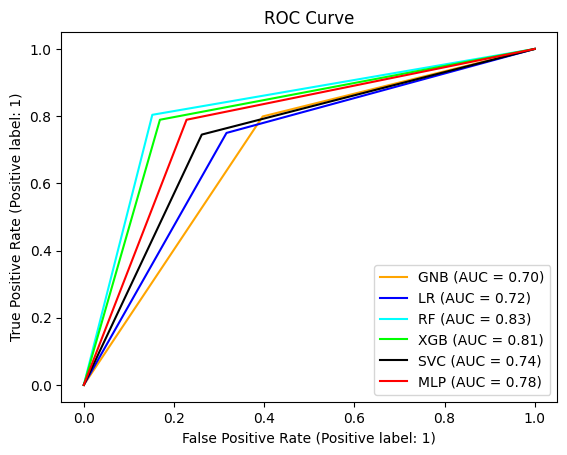

In [ ]:
fig, ax = plt.subplots()
plt.title("ROC Curve")
RocCurveDisplay.from_predictions(y_test, y_pred_nb, ax = ax, name = "GNB", color='orange')
RocCurveDisplay.from_predictions(y_test, y_pred_lr, ax = ax, name = "LR", color='blue')
RocCurveDisplay.from_predictions(y_test, y_pred_rf, ax = ax, name = "RF", color='cyan')
RocCurveDisplay.from_predictions(y_test, y_pred_xgb, ax = ax, name = "XGB", color='lime')
RocCurveDisplay.from_predictions(y_test, y_pred_svc, ax = ax, name = "SVC", color='black')
RocCurveDisplay.from_predictions(y_test, y_pred_mlp, ax = ax, name = "MLP", color='red')

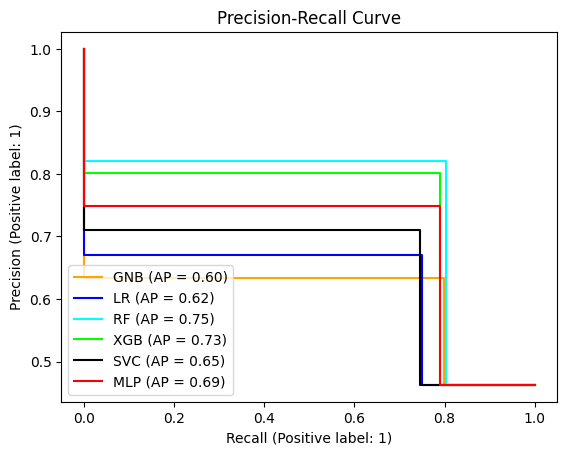

In [ ]:
fig, ax = plt.subplots()
plt.title("Precision-Recall Curve")
PrecisionRecallDisplay.from_predictions(y_test, y_pred_nb, ax = ax, name = "GNB", color='orange')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lr, ax = ax, name = "LR", color='blue')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, ax = ax, name = "RF", color='cyan')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_xgb, ax = ax, name = "XGB", color='lime')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_svc, ax = ax, name = "SVC", color='black')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_mlp, ax = ax, name = "MLP", color='red')